In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import astropy
from astropy.io import fits
from astropy.stats import sigma_clip
from numpy.random import randn
from numpy import mean
from numpy import ma
import warnings
warnings.filterwarnings('ignore')

In [2]:
def reject_outliers(data, m=2):
    #print(data)
    #print(' ')
    stdev = np.nanstd(data)
    mean = np.nanmean(data)
    median = np.nanmedian(data)
    Min = median - stdev * m
    Max = median + stdev * m
    #print(Min, Max)
    for p, point in enumerate(data):
        if point < Min: data[p]=np.nan
        if point > Max: data[p]=np.nan
    #print(data)
    #print(' ')
    return data

In [3]:
filters=['vv','bb','uu','w1','m2','w2']
#filters=['w2']


apcor=[1.086,1.086,1.10,1.11,1.12,1.15]

comps=['1','2','3','4','5','6','7','8','9','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39']

#comps=['1','2','3','4']
fields=['SN2005am','SN2005cf','SN2006X','SN2006aj','SN2006jc','SN2007cv','SN2007on','SN2007pk','SN2009ig','SN2010al','SN2011by','SN2011hw','SN2011iw','SN2012fr','LSQ13cuw','SN2016gxp','SN2018aoz','SN2018xx','SN2018hna','SN2019hgp','SN2019np','SN2019wep','SN2019yvq','SN2020hvf','SN2021csp','SN2021yja'] 
fields=['SN2005am','SN2005cf','SN2006X','SN2006aj','SN2006jc','SN2007cv','SN2007on','SN2007pk','SN2009ig','SN2010al','SN2011by','SN2011hw','SN2011iw','SN2012fr','LSQ13cuw','SN2016gxp','SN2018aoz','SN2018xx','SN2018cow','SN2018hna','SN2019hgp','SN2019np','SN2019wep','SN2019yvq','SN2020hvf','SN2021csp','SN2021yja','SN2022hrs','SN2023bee'] 
#fields=['SN2005am'] 
#fields=['SN2006jc','SN2023bee'] 
fields=['WD1026','WD1121','WD1657'] 
colors=['#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a']
#centroidcolors=['#73a2c6', '#f4777f', '#93003a','#00429d']
#colors=['blue','green', 'red', 'purple']
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.style.use('classic')


In [4]:

mostepochs=300
mostcomps=len(comps)
mostfilters=6
mostfields=len(fields)

cr3 =np.empty((mostfilters, mostfields,mostcomps,mostepochs))
cr3e=np.empty((mostfilters, mostfields,mostcomps,mostepochs))
cr5 =np.empty((mostfilters, mostfields,mostcomps,mostepochs))
cr5e=np.empty((mostfilters, mostfields,mostcomps,mostepochs))

        
year =np.empty((mostfilters, mostfields,mostcomps,mostepochs))
exposure=np.empty((mostfilters, mostfields,mostcomps,mostepochs))
telapse =np.empty((mostfilters, mostfields,mostcomps,mostepochs))
bkg=np.empty((mostfilters, mostfields,mostcomps,mostepochs))

year[:] = np.nan
exposure[:] = np.nan
telapse[:] = np.nan
bkg[:] = np.nan


        
cr3[:] = np.nan
cr3e[:] = np.nan
cr5[:] = np.nan
cr5e[:] = np.nan

frameapcor=np.empty((mostfilters, mostfields,mostepochs))
frameapcor[:] = np.nan
frameapcorscat=np.empty((mostfilters, mostfields,mostepochs))
frameapcorscat[:] = np.nan

compapcor=np.empty((mostfilters, mostfields,mostcomps))
compapcor[:] = np.nan

compapcorscat=np.empty((mostfilters, mostfields,mostcomps))
compapcorscat[:] = np.nan


for i, filter in enumerate(filters):
    print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]    
    for j, field in enumerate(fields):
        #print(field)
        fieldindex=fields.index(field)
        #if index==1: 
            #ax.text(57000, 1.35-fieldindex*0.05, field, fontsize=12, color=colors[fieldindex])

        for c, comp in enumerate(comps):
            #print(" ")
            #print("comp ",int(comp))
            file='compdata/'+field+'_'+filter+'_3_comp'+comp+'_more.dat'
            if os.path.exists(file):
                f = open(file, 'r')
                #print(file)
                for e, line in enumerate(f):
                    #print( x, y)
                    #print(line)
                    columns=line.split()
                    #print(field, comp)
                    #print(columns)
                    #print(columns[0],columns[1])                    
                    # columns[1] isn't parsed right but this seems to work
                    
                    #if float(columns[7])/float(columns[8]) >5:
                        
                    year[i,j,c,e]=columns[1]
                    exposure[i,j,c,e]=columns[2]
                    telapse[i,j,c,e]=columns[3]
                    bkg[i,j,c,e]=columns[6]

                    cr3[i,j,c,e]=columns[4]
                    cr3e[i,j,c,e]=columns[5]
                    cr5[i,j,c,e]=columns[7]
                    cr5e[i,j,c,e]=columns[8]
                    #print(cr5[i,j,c,e])
                #print("Ap 5 count rates")
                #print(cr5[i,j,c,:])
                #print("Ap Cor mean for Comp ",c+1)
                #print(c)
                #data=cr5[i,j,c,:]
                #reject_outliers(data, m=2)
                #cr5[i,j,c,:]=data
                compapcor[i,j,c]=np.nanmean(np.divide(cr5[i,j,c,:],cr3[i,j,c,:]))
                #print(compapcor[i,j,c])

                compapcorscat[i,j,c]=np.nanstd(np.divide(cr5[i,j,c,:],cr3[i,j,c,:]))
                #print("Ap Cor scat for Comp ",c+1)
                #print(compapcorscat[i,j,c])


                f.close()
            
        cr3=np.array(cr3, dtype=np.float32)
        cr5=np.array(cr5, dtype=np.float32)
        cr3e=np.array(cr3e, dtype=np.float32)
        cr5e=np.array(cr5e, dtype=np.float32)

        for e in range(0,len(frameapcor[i,j,:])-2):
            #print(" ")
            #print(np.divide(cr5[i,j,:,e],cr3[i,j,:,e]))
            frameapcor[i,j,e]   =np.nanmean(np.divide(cr5[i,j,:,e],cr3[i,j,:,e]))
            frameapcorscat[i,j,e]=np.nanstd(np.divide(cr5[i,j,:,e],cr3[i,j,:,e]))

frameapcor=np.array(frameapcor, dtype=np.float32)

frameapcorscat=np.array(frameapcorscat, dtype=np.float32)

compapcor=np.array(compapcor, dtype=np.float32)

compapcorscat=np.array(compapcorscat, dtype=np.float32)

year=(year-2005)/365.25+2005
                
#print("I finished.  I'm not really stuck.")



vv
bb
uu
w1
m2
w2


In [5]:
#for c in range(len(comps)): print(frameapcor[i,0,c], frameapcorscat[i,0,c])
    

vv
bb
uu
w1
m2
w2


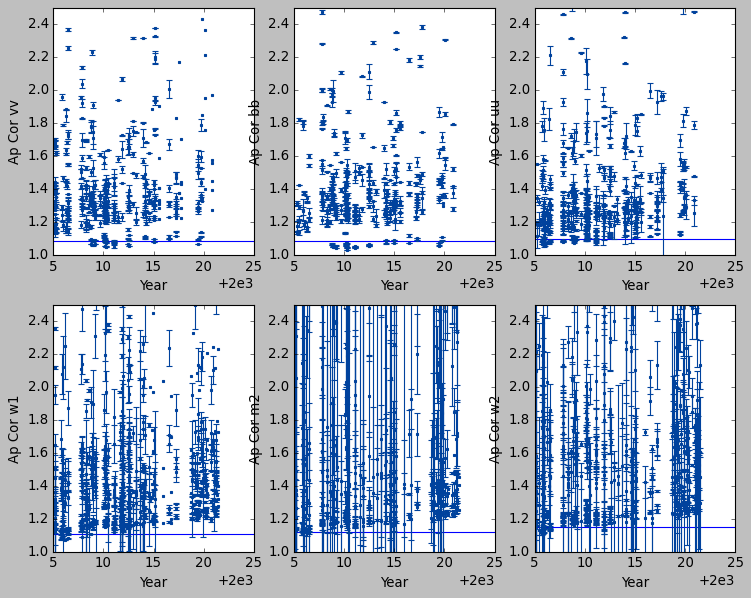

In [6]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('Year')

    ax.set_ylabel('Ap Cor '+filter)
    ax.axis([2005,2025,1.0, 2.5])
    
    ax.plot([2005,2025],apcorline)
   
    

    for j, field in enumerate(fields):
        for c in range(len(comps)):   
            ax.errorbar(year[i,j,c,:], np.divide(cr5[i,j,c,:],cr3[i,j,c,:]), np.divide(cr5e[i,0,c,:],cr3[i,0,c,:]) ,   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

            #ax.errorbar(year[i,j,c,:], frameapcor[i,j,:], frameapcorscat[i,j,:] ,   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

        
plt.savefig('UVOTapcor_year.eps', dpi=300, bbox_inches='tight')
plt.show()

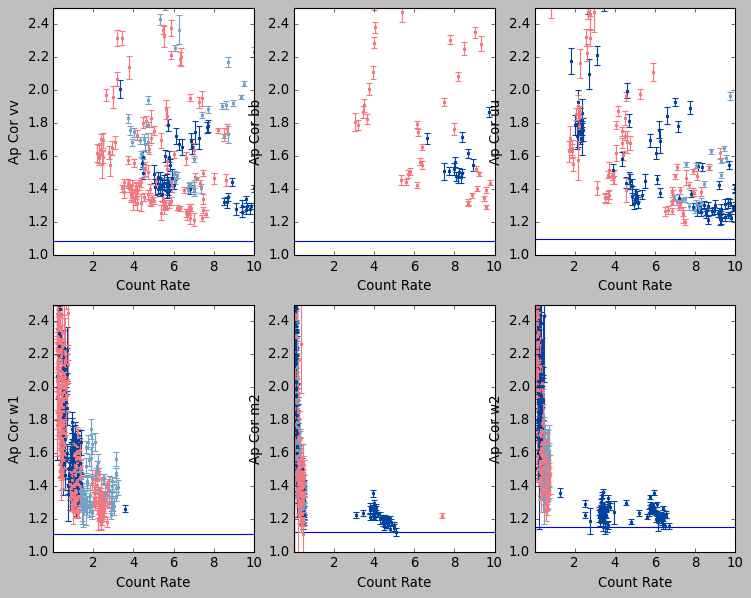

In [7]:


fig = plt.figure(figsize=(11, 8.5))





for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('Count Rate')

    ax.set_ylabel('Ap Cor '+filter)
    ax.axis([0.01,10,1, 2.5])
    
    ax.plot([0.01,10],apcorline)

    for j, field in enumerate(fields):
        fieldindex=j
        for c in range(len(comps)):   
            ax.errorbar(cr5[i,j,c,:], np.divide(cr5[i,j,c,:],cr3[i,j,c,:]), np.divide(cr5e[i,j,c,:],cr3[i,j,c,:]) ,   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

plt.savefig('UVOTapcor_cr.eps', dpi=300, bbox_inches='tight')
plt.show()

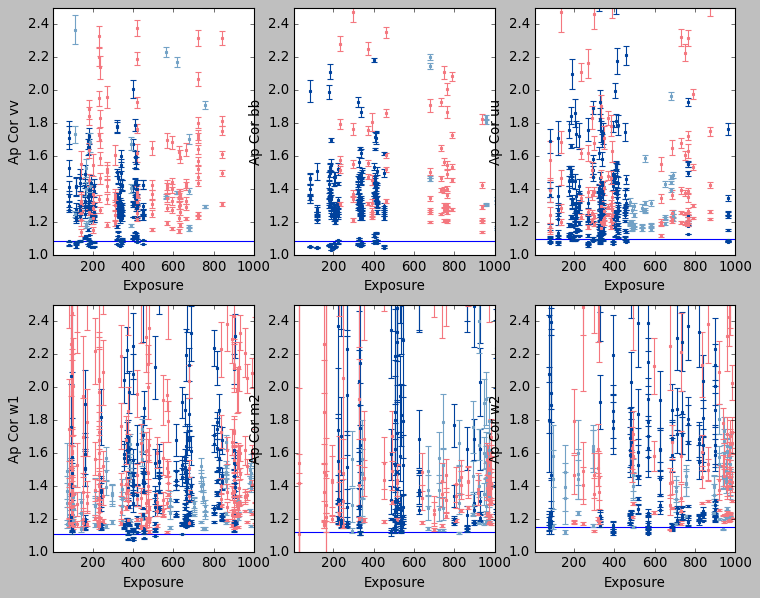

In [8]:
fig = plt.figure(figsize=(11, 8.5))

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('Exposure')

    ax.set_ylabel('Ap Cor '+filter)
    ax.axis([5,1000,1, 2.5])
    
    ax.plot([0.01,1000],apcorline)

    for j, field in enumerate(fields):
        fieldindex=j
        for c in range(len(comps)):   
            ax.errorbar(exposure[i,j,c,:], cr5[i,j,c,:]/cr3[i,j,c,:], cr5e[i,j,c,:]/cr3[i,j,c,:] ,   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

plt.savefig('UVOTapcor_exp.eps', dpi=300, bbox_inches='tight')
plt.show()

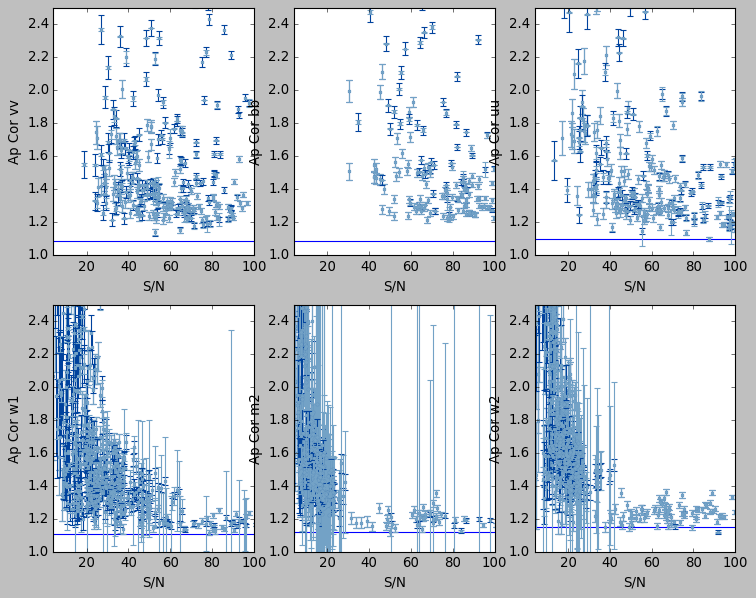

In [9]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('S/N')

    ax.set_ylabel('Ap Cor '+filter)
    ax.axis([4,100,1, 2.5])
    
    ax.plot([4,200],apcorline)

    for j, field in enumerate(fields):
        for c in range(len(comps)):   
            ax.errorbar(cr5[i,j,c,:]/cr5e[i,j,c,:], cr5[i,j,c,:]/cr3[i,j,c,:], cr5e[i,j,c,:]/cr3[i,j,c,:] ,   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

        
            ax.errorbar(np.divide(cr5[i,j,c,:],cr5e[i,j,c,:]), np.divide(cr5[i,j,c,:],cr3[i,j,c,:]), np.divide(cr5e[i,0,c,:],cr3[i,0,c,:]) ,   marker='s', linestyle='none', mfc=colors[fieldindex+1],mec=colors[fieldindex+1], ms=2, mew=1, color=colors[fieldindex+1])

plt.savefig('UVOTapcor_sn.eps', dpi=300, bbox_inches='tight')
plt.show()

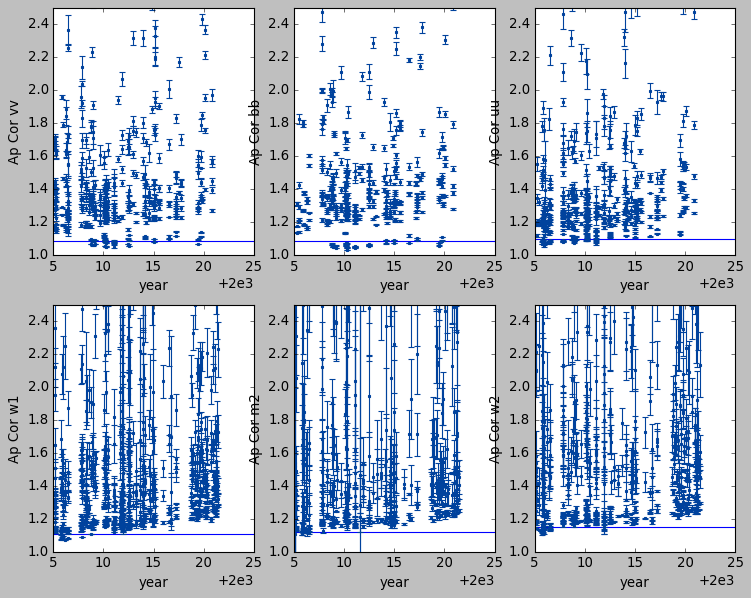

In [10]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('year')

    ax.set_ylabel('Ap Cor '+filter)
    ax.axis([2005, 2025,1, 2.5])
    
    ax.plot([2005, 2025],apcorline)

    for j, field in enumerate(fields):
        for c in range(len(comps)):   
            ax.errorbar(year[i,j,c,:], cr5[i,j,c,:]/cr3[i,j,c,:], cr5e[i,j,c,:]/cr3[i,j,c,:] ,   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

        
plt.savefig('UVOTapcor_year.eps', dpi=300, bbox_inches='tight')
plt.show()

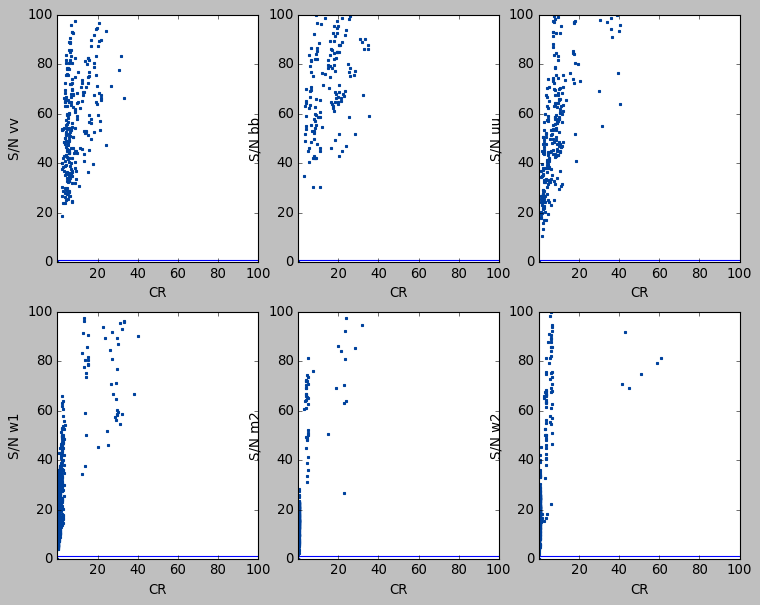

In [11]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('CR')

    ax.set_ylabel('S/N '+filter)
    ax.axis([0.01,100,0,100])
    
    ax.plot([0.01,100],apcorline)

    for j, field in enumerate(fields):
        for c in range(len(comps)):   
            ax.errorbar(cr5[i,j,c,:], cr5[i,j,c,:]/cr5e[i,j,c,:],   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

plt.savefig('UVOTcr_sn.eps', dpi=300, bbox_inches='tight')
plt.show()

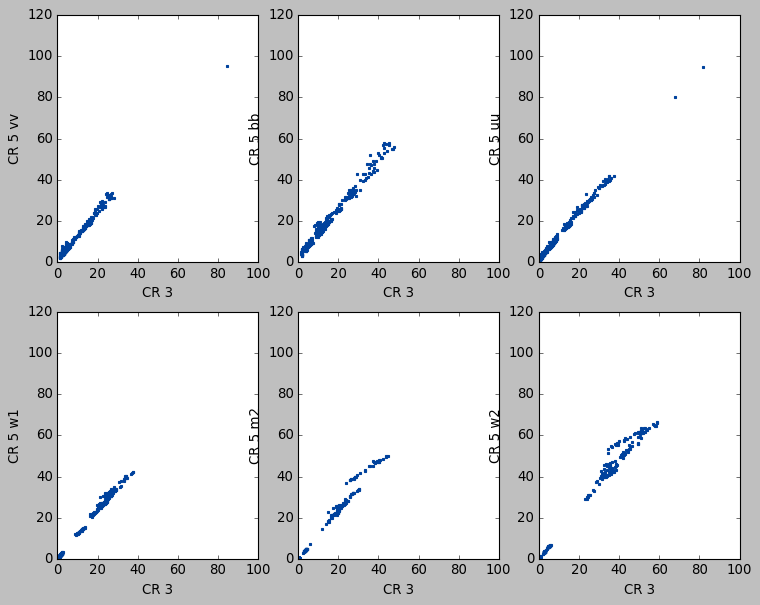

In [12]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('CR 3')

    ax.set_ylabel('CR 5 '+filter)
    ax.axis([0.0,100,0,120])
    
    #ax.plot([0.0,100],apcorline)

    for j, field in enumerate(fields):
        for c in range(len(comps)):   
            ax.errorbar(cr3[i,j,c,:], cr5[i,j,c,:],   marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

plt.savefig('UVOTcr_cr3vcr5.eps', dpi=300, bbox_inches='tight')
plt.show()

IndexError: index 48 is out of bounds for axis 2 with size 48

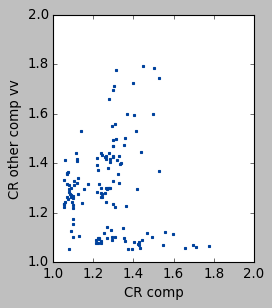

In [13]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('CR comp')

    ax.set_ylabel('CR other comp '+filter)
    ax.axis([1.0,2,1,2])
    
    #ax.plot([0.0,100],apcorline)

    for j, field in enumerate(fields):
        for c in range(len(comps)):   
            ax.errorbar( cr5[i,j,c,:]/cr3[i,j,c,:], cr5[i,j,c+1,:]/cr3[i,j,c+1,:],  marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

plt.savefig('UVOTcr_cr.eps', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('CR ')

    ax.set_ylabel('mean ap cor '+filter)
    ax.axis([1.0,2,1,2])
    
    #ax.plot([0.0,100],apcorline)
    print(compapcor[i,0,:])
    ax.errorbar( cr5[i,0,:,0], compapcor[i,0,:], compapcorscat[i,0,:],  marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

    

    
plt.savefig('UVOTcr_compmean.eps', dpi=300, bbox_inches='tight')
plt.show()





In [ ]:
fig = plt.figure(figsize=(11, 8.5))

fieldindex=0

for i, filter in enumerate(filters):
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('CR comp')

    ax.set_ylabel('CR other comp '+filter)
    ax.axis([1.0,2,1,2])
    
    #ax.plot([0.0,100],apcorline)

    ax.errorbar( cr5[i,0,:,0], frameapcor[i,0,:], frameapcorscat[i,0,:],  marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

plt.savefig('UVOTcr_framemean.eps', dpi=300, bbox_inches='tight')
plt.show()




In [ ]:
print(telapse)

In [ ]:
print(cr5)